# Predictive Analytics - Class Exercise on Clustering

We first import everything we need (this is good practice).

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm

We start by loading the famous [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), which is provided by `scikit learn` directly and then we transform it into a data frame (just so we can have a little nicer look at it).

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


We then use only the petal features to cluster the data (so that we can visualize it better).

In [3]:
petal = df.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1)
petal.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


And as a final preparation step, we store the values we need in an array again, so we can use it in our algorithms directly.

In [4]:
X = petal.values
X[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

### 1. Produce a scatter plot of the array X

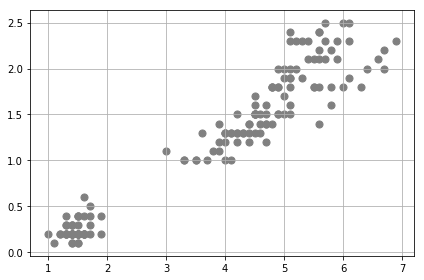

In [5]:
plt.scatter(X[:,0], X[:,1], c='grey', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

### 2. Try to find the optimal number of clusters using the elbow method

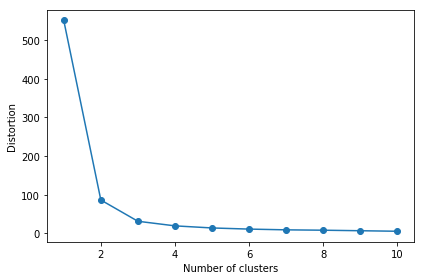

In [6]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='random',
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
plt.show()

### 3. Apply KMeans with random seeding with k = 3

In [7]:
km = KMeans(n_clusters=3, 
            init='random', # leave this out for k-means++
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

### 4. Plot the results using different colors for the clusters and showing the centroids

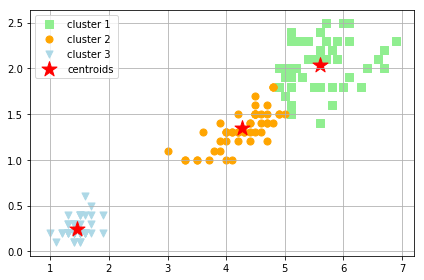

In [8]:
plt.scatter(X[y_km==0,0], 
            X[y_km==0,1], 
            s=50, 
            c='lightgreen', 
            marker='s', 
            label='cluster 1')
plt.scatter(X[y_km==1,0], 
            X[y_km==1,1], 
            s=50, 
            c='orange', 
            marker='o', 
            label='cluster 2')
plt.scatter(X[y_km==2,0], 
            X[y_km==2,1], 
            s=50, 
            c='lightblue', 
            marker='v', 
            label='cluster 3')
plt.scatter(km.cluster_centers_[:,0], 
            km.cluster_centers_[:,1], 
            s=250, 
            marker='*', 
            c='red', 
            label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### 5. Use the silhouette method to find out whether to use 2, 3, or 4 clusters for agglomerative clustering using complete linkage (with euclidean distance)

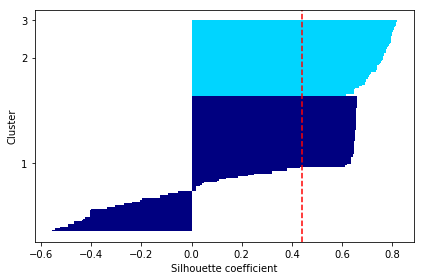

In [9]:
# vary n_cl in the following and compare the results (n_cl then passed to Clustering)
n_cl = 2
ac = AgglomerativeClustering(n_clusters=n_cl, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_ac, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_ac==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
            edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# vary the filename in the following in accordance to n_clusters to document your results
plt.savefig('./images/silhouette'+str(n_cl)+'.png', dpi=300)
plt.show()

### 6. Apply agglomerative clustering using complete linkage and 3 clusters

In [10]:
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)

### 7. Display the results in a scatter plot

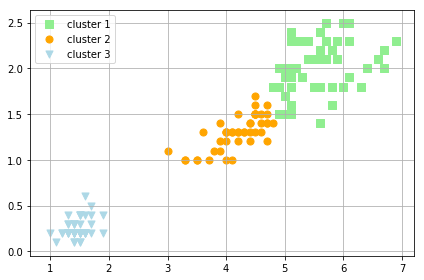

In [11]:
plt.scatter(X[y_ac==0,0], 
            X[y_ac==0,1], 
            s=50, 
            c='lightgreen', 
            marker='s', 
            label='cluster 1')
plt.scatter(X[y_ac==1,0], 
            X[y_ac==1,1], 
            s=50, 
            c='orange', 
            marker='o', 
            label='cluster 2')
plt.scatter(X[y_ac==2,0], 
            X[y_ac==2,1], 
            s=50, 
            c='lightblue', 
            marker='v', 
            label='cluster 3')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Obviously, in this case there are no centroids to be visualized.